<a href="https://colab.research.google.com/github/Carr-23/ImageClassification/blob/master/Image_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

import numpy
import matplotlib.pyplot as plt
import matplotlib

from tensorflow.keras.datasets import cifar10

In [ ]:
(xTrain, yTrain), (xTest, yTest) =cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
cifar10DataSet = [
                  'airplane',
                  'automobile',
                  'bird',
                  'cat',
                  'deer',
                  'dog',
                  'frog',
                  'horse',
                  'ship',
                  'truck'
]

In [ ]:
xTrain.max()

255

In [ ]:
xTrain.shape

(50000, 32, 32, 3)

In [ ]:
xTrain = xTrain/255.0
xTest = xTest/255.0

In [ ]:
printt(xTrain)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

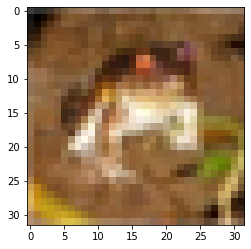

In [ ]:
plt.imshow(xTrain[0])

In [ ]:
model = Sequential()

In [ ]:
#Input Layer
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))

# Conv2D create a formula
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))

# Maxpooling, to simplify image
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

# Dropout 50% of neuron
model.add(Dropout(0.5))

# Flatten everything
model.add(Flatten())

model.add(Dense(units = 128, activation='relu'))

# Output Layer
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
history = model.fit(xTrain,yTrain,batch_size=10,epochs=10,verbose=1,validation_data=(xTest,yTest))

Epoch 1/10
5000/5000 [==============================] - 226s 45ms/step - loss: 1.6521 - sparse_categorical_accuracy: 0.3980 - val_loss: 1.2296 - val_sparse_categorical_accuracy: 0.5552
Epoch 2/10
5000/5000 [==============================] - 223s 45ms/step - loss: 1.1668 - sparse_categorical_accuracy: 0.5839 - val_loss: 1.0370 - val_sparse_categorical_accuracy: 0.6303
Epoch 3/10
5000/5000 [==============================] - 222s 44ms/step - loss: 1.0316 - sparse_categorical_accuracy: 0.6351 - val_loss: 1.0476 - val_sparse_categorical_accuracy: 0.6313
Epoch 4/10
5000/5000 [==============================] - 222s 44ms/step - loss: 0.9404 - sparse_categorical_accuracy: 0.6654 - val_loss: 0.9597 - val_sparse_categorical_accuracy: 0.6579
Epoch 5/10
5000/5000 [==============================] - 224s 45ms/step - loss: 0.8684 - sparse_categorical_accuracy: 0.6907 - val_loss: 0.9179 - val_sparse_categorical_accuracy: 0.6744
Epoch 6/10
5000/5000 [==============================] - 224s 45ms/step - lo

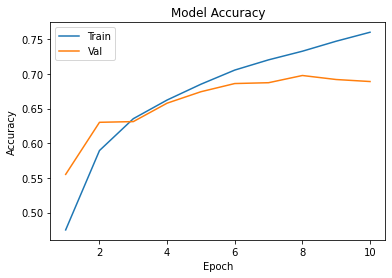

In [ ]:
# Plot Training & Validation Accuracy Values
epoch_range = range(1,11)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
yPred = model.predict_classes(xTest)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
accuracy_score(yTest,yPred)

0.6891

In [ ]:
yPred[69]

7

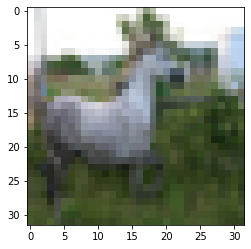

In [ ]:
plt.imshow(xTest[69])

In [ ]:
yTest[69]

array([7], dtype=uint8)